## Gradiente descendente
O algoritmo do gradiente descendente é um algoritmo de otimização muito utilizado no aprendizado de máquina que é capaz de otimizar um processo de convergência para encontrar o menor erro possível de um aprendizado de um algoritmo. O grande objetivo desse algoritmo é ajustar iterativamente os parâmetros do algoritmo para minimizar uma função de custo.

**Objetivo:** O principal objetivo do gradiente descendente é encontrar os valores ótimos dos parâmetros (ou pesos) de um modelo, de modo que o modelo tenha o melhor desempenho possível em termos de previsão.

**Função de Custo:** A função de custo é uma métrica que quantifica o erro ou a perda do modelo. Por exemplo, em problemas de regressão, uma função comum é o Erro Quadrático Médio (MSE), que calcula a média dos quadrados das diferenças entre os valores previstos e os reais.

**Cálculo do Gradiente:** O gradiente é o vetor que contém as derivadas parciais da função de custo em relação a cada parâmetro. Ele indica a direção e a magnitude da mudança que deve ser feita em cada parâmetro para reduzir o erro.

**Atualização dos Pesos:** O modelo ajusta seus parâmetros em direção ao mínimo da função de custo. O ajuste é feito com base no gradiente calculado e uma taxa de aprendizado (denotada por 𝛼, também chamada de learning rate).

**Iterações:** O algoritmo executa várias iterações (ou épocas), onde, em cada uma delas, ele calcula o gradiente, ajusta os parâmetros e repete esse processo até que a função de custo atinja um valor mínimo ou até que um critério de parada seja atingido.

### Tipos de Gradiente Descendente
1. Gradiente Descendente Padrão (Batch Gradient Descent): Utiliza o conjunto de dados inteiro para calcular o gradiente e atualizar os parâmetros. A cada iteração, é garantido que os parâmetros vão em direção ao mínimo global (em caso de funções convexas), mas pode ser muito lento, principalmente com grandes volumes de dados, porque precisa processar o conjunto de dados completo em cada iteração.
2. Gradiente Descendente Estocástico (Stochastic Gradient Descent - SGD): Em vez de usar o conjunto de dados completo, o SGD utiliza apenas um exemplo de treinamento por vez para calcular o gradiente e atualizar os parâmetros, o que o torna muito mais rápido que o gradiente descendente padrão, pois as atualizações são feitas a cada exemplo de treinamento. Porém, como ele faz atualizações mais frequentes e com mais variação, pode não convergir tão suavemente para o mínimo global. Pode se mover em torno do valor ótimo, mas eventualmente se estabiliza em torno de um mínimo local.
3. Gradiente Descendente Mini-Batch (Mini-Batch Gradient Descent): Uma combinação entre os dois métodos anteriores. Em vez de usar o conjunto de dados inteiro ou um único exemplo, utiliza um pequeno lote de exemplos (mini-batch) para calcular o gradiente.

**Taxa de Aprendizado (𝛼):** A taxa de aprendizado é um dos parâmetros mais importantes do gradiente descendente. Ela controla o tamanho do passo dado em cada iteração. Se a taxa de aprendizado for muito alta, o modelo pode "pular" o mínimo global e nunca convergir. Se for muito baixa, o modelo pode levar muito tempo para convergir ou ficar preso em um mínimo local. Existem técnicas de ajuste da taxa de aprendizado ao longo do treinamento, como decay (diminuição da taxa de aprendizado conforme o número de iterações aumenta), para melhorar a convergência.

### Você deve usá-lo quando:

* Modelos com parâmetros ajustáveis: Como redes neurais, regressão linear e logística.
* Funções de custo complexas ou não convexas: Como em redes neurais profundas.
* Grandes volumes de dados: Usando gradiente descendente estocástico (SGD) ou mini-batch para processar dados em partes.
* Sistemas em tempo real: Para ajustar modelos continuamente com novos dados.
* Problemas sem solução analítica: Quando não há solução fechada ou direta para o modelo.
* Modelos altamente paramétricos: Como redes neurais profundas, com muitos parâmetros a serem ajustados.
* Convergência gradual: Quando não é necessário encontrar a solução exata de imediato.

1. Importações

In [23]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

2. Carrega dataset

In [17]:
dados = pd.read_csv(".\datasets\housing.csv", encoding = 'utf-8', sep= ',')
dados.head()

<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\alice\AppData\Local\Temp\ipykernel_15900\2355881703.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  dados = pd.read_csv(".\datasets\housing.csv", encoding = 'utf-8', sep= ',')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


3. Exploração de dados

In [18]:
set(dados['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [19]:
dados.shape

(20640, 10)

4. Feature Engineering

In [20]:
# Instanciando a classe do OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(dados[['ocean_proximity']]).toarray()
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenar os novos dados codificados ao dados
df_encoded = pd.concat([dados, df_encoded], axis=1)
df_encoded = df_encoded.drop(['ocean_proximity'], axis=1)
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df_encoded.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [24]:
imputer = SimpleImputer(strategy='median')
df_encoded_limpo = imputer.fit_transform(df_encoded)

In [25]:
df_encoded_limpo = pd.DataFrame(df_encoded_limpo, columns=df_encoded.columns)
df_encoded_limpo.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df_encoded_limpo.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

5. Separando os dados em treino e teste

In [27]:
df_encoded_limpo.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='str')

In [28]:
# Separando os dados em x e y
X = df_encoded_limpo.drop(['median_house_value'], axis=1)
y = df_encoded_limpo['median_house_value'].values

In [29]:
X.shape

(20640, 13)

In [30]:
y.shape

(20640,)

In [31]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0


6. Padronizando/Normalizando as características


A transformação das features em escalas padronizadas é essencial para a função de custo convergir no mínimo local de forma mais rápida e eficiente. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler apenas na base de treino
scaler.fit(X_train)

# Aplicar a transformação nas bases de treino e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.18553953,  0.90651045, -1.07984112, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ]], shape=(16512, 13))

7. Aplicando o algoritmo de gradiente

O gradiente descendente estocástico escolhe uma instância aleatória no conjunto de treinamento em cada etapa e calcula os gradientes baseados apenas nessa única instância.

Isso torna esse tipo de gradiente bem mais rápido, pois poucos dados são manipulados em cada iteração. Uma ótima opção para grandes conjuntos de dados, uma vez que apenas uma instância precisa estar na memória a cada iteração. Porém, devido a sua aleatoriedade (dai que vem a palavrinha estocástica), esse algoritmo é bem menos regular que o gradiente descendente em lote. Em vez de diminuir suavemente até atingir o mínimo, a função de custo vai subir e descer, diminuindo apenas a média. Ao longo do tempo acabará bem perto do mínimo, mas ao chegar lá, gradiente continua a rebater, nunca se estabilizando, gerando assim valores finais bons mas não ótimos. 

Quando a função de custo é muito irregular, pode ajudar o algoritmo a pular fora do mínimo local, de modo que o gradiente estocástico terá uma chance maior de encontrar o mínimo global do que o gradiente em lote. Desta forma, a aleatoriedade é boa para escapar de um ótimo local, mas ruim porque significa que o algoritmo nunca pode se estabelecer no mínimo. Uma boa solução para escapar dessa situação é diminuir gradualmente a taxa de aprendizagem. As etapas começam grandes, auxiliando a escapar dos mínimos locais, e depois diminuir as etapas permitindo que o algoritmo se estabeleça no mínimo global.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [35]:
# A estratégia learning_rate='optimal' é geralmente uma boa escolha para problemas de regressão linear
# Especialmente quando a regularização L2 é utilizada.

# Treinar o modelo com SGDRegressor
sgd_reg = SGDRegressor(loss='squared_error',
                       learning_rate='optimal',
                       alpha=0.001,  # Quanto maior o valor, mais forte será a regularização.
                       penalty='l2', # adiciona uma penalidade à função de custo que é proporcional à soma dos quadrados dos
                                     # valores dos parâmetros do modelo (evita o overfitting)
                       max_iter=1000)
sgd_reg.fit(X_train_scaled, y_train.ravel())

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


Principais parâmetros do scikit-learn para descida do gradiente
* loss (padrão='squared_loss'): Função de perda a ser minimizada (por exemplo, 'squared_loss' para erro quadrático médio).
* learning_rate (padrão='invscaling'): Estratégia de taxa de aprendizado (por exemplo, 'invscaling' para taxa decrescente inversamente proporcional ao número de iterações).
* alpha (padrão=0.0001): Regularização L1 ou L2 (parâmetro de regularização). Quanto maior o valor, mais forte será a regularização. Também usado para calcular a taxa de aprendizagem quando learning_rate definido como 'optimal'. Os valores devem estar no intervalo .[0.0, inf).
* penalty (padrão=l2): Termo de regularização a ser utilizado no modelo.
* max_iter (padrão=1000): Número máximo de iterações.

Quais são os tipos de regularização e como escolher? 
* **Regularização L1 (LASSO)** Essa técnica adiciona uma penalidade à função de custo que é proporcional à soma dos valores absolutos dos parâmetros do modelo. Essa aplicação de penalidade, auxilia o modelo a encontrar soluções com menos parâmetros (o que reduz a complexidade do modelo).
* **Regularização L2 (RIDGE)** Essa técnica adiciona uma penalidade à função de custo que é proporcional à soma dos quadrados dos valores dos parâmetros do modelo. Esse tipo de penalidade evita que os parâmetros dos modelos assumam valores muito grandes ( o que previne o overfitting).
* **Elastic Net (combinação de L1 e L2)** Esse tipo de técnica realiza a combinação das regularizações L1 e L2, fornecendo assim flexibilidade na seleção de features e na redução da complexidade do modelo.

Validando o modelo com métricas de regressão 

* R²: O R² é uma medida de quão bem o modelo se ajusta aos dados. Ele varia de 0 a 1, onde 1 indica um ajuste perfeito.
* Erro quadrático médio: O erro quadrático médio é uma medida da diferença entre os valores previstos e os valores reais. Ele é calculado somando os quadrados das diferenças entre os valores previstos e os valores reais e dividindo pelo número de observações.
* Erro absoluto médio: O erro absoluto médio é uma medida da diferença média entre os valores previstos e os valores reais. Ele é calculado somando as diferenças absolutas entre os valores previstos e os valores reais e dividindo pelo número de observações.
* Erro percentual absoluto médio: O erro percentual absoluto médio é uma medida da diferença média percentual entre os valores previstos e os valores reais. Ele é calculado somando as diferenças percentuais absolutas entre os valores previstos e os valores reais e dividindo pelo número de observações.

In [36]:
# Avaliar o modelo na base de teste
y_pred = sgd_reg.predict(X_test_scaled)


r2 = r2_score(y_test, y_pred) # R²
mse = mean_squared_error(y_test, y_pred) # Erro quadrático médio
mae = mean_absolute_error(y_test, y_pred) # Erro absoluto médio

# Imprimir os resultados
print("R²:", r2)
print("Erro quadrático médio:", mse)
print("Erro absoluto médio:", mae)

R²: 0.6220748683492555
Erro quadrático médio: 4952364856.180097
Erro absoluto médio: 50690.16026766317


In [14]:
#Calcula o erro percentual absoluto médio
def mapr(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mapr_sgd = mapr(y_test, y_pred)
print("Erro percentual absoluto médio:", mapr_sgd)

Erro percentual absoluto médio: inf


C:\Users\alice\AppData\Local\Temp\ipykernel_15900\40597767.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


8. Utilizando o gradiente nas redes neurais

Também podemos utilizar os gradientes nas redes neurais! Utilizando o modelo de Regressor Perceptron multicamadas.

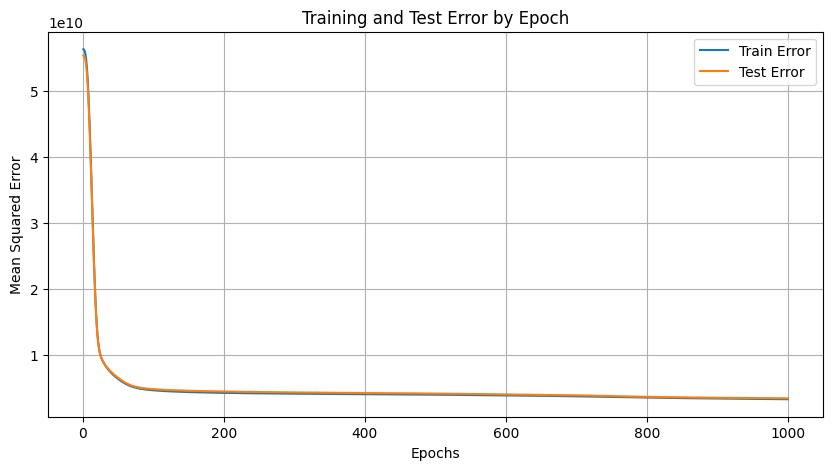

In [37]:
# Define the MLPRegressor model
model_mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50),
                                   max_iter=1000,
                                   activation='relu',
                                   learning_rate='adaptive',
                                   solver='adam',
                                   alpha=0.0001)

# Gradiente adam ("Adaptive Moment Estimation"):
# ajusta iterativamente os pesos da rede neural usando momentos adaptativos dos gradientes.
# O segredo do ADAM reside em sua combinação inteligente de duas técnicas bem-sucedidas:
  # Momentum: Essa técnica acumula os gradientes anteriores, impulsionando o movimento em direções consistentes e suavizando o caminho de otimização.
  # RMSprop (Root Mean Square Prop): Esse método ajusta adaptativamente a taxa de aprendizado para cada parâmetro com base no histórico recente de seus gradientes.
# Isso permite uma convergência eficiente e robusta, especialmente útil em problemas com grande dimensionalidade ou em presença de ruído.

# Treinar o modelo
epochs = 1000
train_errors = []
test_errors = []

for epoch in range(epochs):
    model_mlp_regressor.partial_fit(X_train_scaled, y_train.ravel())

    # Calcular erro de treinamento
    train_pred = model_mlp_regressor.predict(X_train_scaled)
    train_error = mean_squared_error(y_train.ravel(), train_pred)
    train_errors.append(train_error)

    # Calcular erro de teste
    test_pred = model_mlp_regressor.predict(X_test_scaled)
    test_error = mean_squared_error(y_test.ravel(), test_pred)
    test_errors.append(test_error)

# Plotar resultados
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_errors, label='Train Error')
plt.plot(range(1, epochs + 1), test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error by Epoch')
plt.legend()
plt.grid(True)
plt.show()
     

In [38]:
# Avaliar o modelo na base de teste
y_pred_model_mlp_regressor = model_mlp_regressor.predict(X_test_scaled)

r2_y_pred_model_mlp_regressor = r2_score(y_test, y_pred_model_mlp_regressor) # R²
mse_y_pred_model_mlp_regressor = mean_squared_error(y_test, y_pred_model_mlp_regressor) # Erro quadrático médio
mae_y_pred_model_mlp_regressor = mean_absolute_error(y_test, y_pred_model_mlp_regressor) # Erro absoluto médio
mapr_pred_model_mlp_regressor = mapr(y_test, y_pred_model_mlp_regressor)


# Imprimir os resultados
print("R²:", r2_y_pred_model_mlp_regressor)
print("Erro quadrático médio:", mse_y_pred_model_mlp_regressor)
print("Erro absoluto médio:", mae_y_pred_model_mlp_regressor)
print("Erro percentual absoluto médio:", mapr_pred_model_mlp_regressor)

R²: 0.7364129817905909
Erro quadrático médio: 3454067952.093573
Erro absoluto médio: 40252.89247940982
Erro percentual absoluto médio: 23.032424850328532


9. Testando modelos mais robustos

In [39]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train.ravel())

# Avaliar o modelo na base de teste
y_pred_model_rf_regressor = rf_regressor.predict(X_test_scaled)

r2_y_pred_model_rf_regressor = r2_score(y_test, y_pred_model_rf_regressor) # R²
mse_y_pred_model_rf_regressor = mean_squared_error(y_test, y_pred_model_rf_regressor) # Erro quadrático médio
mae_y_pred_model_rf_regressor = mean_absolute_error(y_test, y_pred_model_rf_regressor) # Erro absoluto médio
mapr_pred_model_rf_regressor = mapr(y_test, y_pred_model_rf_regressor)


# Imprimir os resultados
print("R²:", r2_y_pred_model_rf_regressor)
print("Erro quadrático médio:", mse_y_pred_model_rf_regressor)
print("Erro absoluto médio:", mae_y_pred_model_rf_regressor)
print("Erro percentual absoluto médio:", mapr_pred_model_rf_regressor)

R²: 0.8172085990009053
Erro quadrático médio: 2395314930.144464
Erro absoluto médio: 31628.59239098837
Erro percentual absoluto médio: 17.744667587110687
